# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import seaborn as sns


## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here
def dice(x):
    dice = []
    [dice.append(random.randint(1, 6)) for i in range(x)]
    return dice

data = dice(10)
data


[1, 5, 1, 6, 2, 3, 2, 2, 5, 5]

In [3]:
df = pd.DataFrame(data)
names = df.rename(columns={0: "Values"})
names

,Values
0,1
1,5
2,1
3,6
4,2
5,3
6,2
7,2
8,5
9,5


# 2.- Plot the results sorted by value.

(array([2., 0., 3., 0., 1., 0., 0., 0., 3., 1.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

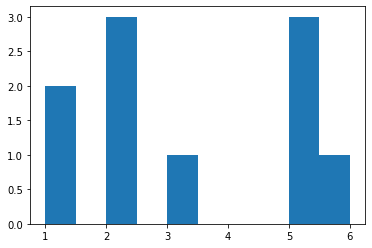

In [4]:
# your code here

plt.hist(data)

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

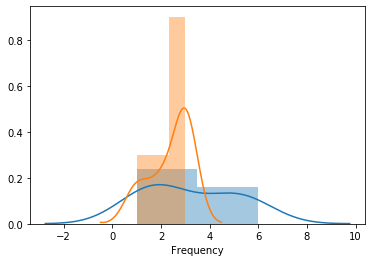

In [5]:
# your code here
names['Frequency'] = names.groupby('Values')['Values'].transform('count')
sns.distplot(names['Values'])
sns.distplot(names['Frequency'])

In [6]:
"""
your comments here
"""

'\nyour comments here\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [7]:
# your code here
def mean(x):
    return sum(x)/len(x)

mean(data)

3.2

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [8]:
# your code here
distribution = pd.Series(data).value_counts().reset_index()
distribution2 = pd.DataFrame(distribution)# 
distribution2.columns = ['Value', 'Frequency']
distribution2

,Value,Frequency
0,5,3
1,2,3
2,1,2
3,6,1
4,3,1


In [9]:
freq = distribution2['Frequency']
mean_freq = sum(freq)/len(freq)
mean_freq

2.0

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [10]:
# your code here
def median(x):
    if len(x) % 2:
        return (x[(len(x)-1) / 2] + x[(len(x)-1) / 2 + 1])/2
    
median(freq)

1.5

In [11]:
freq[len(freq)-1]

1

In [12]:
data.sort()
data

[1, 1, 2, 2, 2, 3, 5, 5, 5, 6]

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [13]:
# your code here
def quartiles(x):
    x.sort()
    n = len(x)/2
    if len(x) % 2 == 0:
        q1 = (x[int(n/2) - 1] + x[int(n/2)]) / 2
        q2 = (x[int(n) - 1] + x[int(n)]) / 2
        q3 = (x[-int(q1)+1] + x[-int(q1)]) / 2
        return q1, q2, q3
    else:
        pass
    return 99#x[q1]
    
quartiles(data)

(1.5, 2.5, 3.5)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

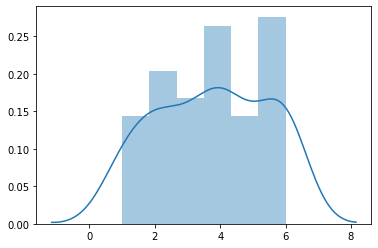

In [14]:
# your code here
hundred_csv = pd.read_csv('/home/alona/Documents/lab-understanding-descriptive-stats/data/roll_the_dice_hundred.csv')
hundred_csv_sort = hundred_csv.sort_values(by="value")
sns.distplot(hundred_csv_sort[["value"]], bins = 6)

In [15]:
hundred_csv.head(10)

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6
5,5,5,5
6,6,6,2
7,7,7,2
8,8,8,4
9,9,9,1


In [16]:
"""
your comments here
"""

'\nyour comments here\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [17]:
# your code here
n = hundred_csv_sort['value']
mean(n)

3.74

#### 3.- Now, calculate the frequency distribution.


In [18]:
# your code here
hundred_csv['Frequency'] = hundred_csv_sort.groupby('value')['value'].transform('count')
#names['Frequency'] = hundred_csv_sort.groupby('value')['value'].transform('count')
hundred_csv.sort_values(by = ['Frequency']).head(10)

,Unnamed: 0,roll,value,Frequency
0,0,0,1,12
32,32,32,5,12
26,26,26,1,12
56,56,56,1,12
47,47,47,1,12
72,72,72,5,12
73,73,73,1,12
74,74,74,5,12
79,79,79,5,12
82,82,82,1,12


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

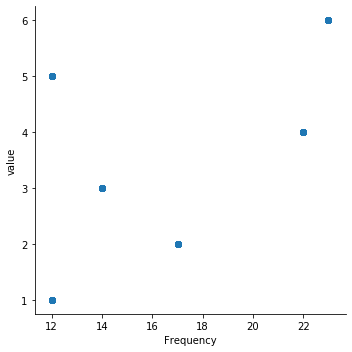

In [19]:
# your code here
#plt.hist(names['Values'], num_bins = 6)
#names['Values'] = names.groupby('Values')['Values'].transform('count')
#sns.distplot(names['Values'])

#names.sort_values(by=["Frequency", "Values"], inplace=True)
#names.plot(x="Frequency", y=["Values"])

#n, bins, 
#features = plt.hist(names['Frequency'], 6, density=1)
#plt.show()

#x = names['Values']
#num_bins = 6
#n, bins, features = plt.hist(x, num_bins, density=1)
#plt.show()



#sns.lineplot(data = hundred_csv['Frequency'])
sns.lmplot(x = 'Frequency', y = 'value', data=hundred_csv, fit_reg=False)

In [20]:
"""
4 is the most frequent value. Histagram is left skewed. The mean number 3.74 for values is working!
"""

'\n4 is the most frequent value. Histagram is left skewed. The mean number 3.74 for values is working!\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [21]:
# your code here
roll_the_dice = pd.read_csv('/home/alona/Documents/lab-understanding-descriptive-stats/data/roll_the_dice_thousand.csv')
dice_sort = roll_the_dice.sort_values(by="value")
dice_sort.head(10)

,Unnamed: 0,roll,value
564,564,564,1
922,922,922,1
560,560,560,1
213,213,213,1
214,214,214,1
221,221,221,1
222,222,222,1
551,551,551,1
549,549,549,1
911,911,911,1


In [22]:
dice_sort['Frequency'] = dice_sort.groupby('value')['value'].transform('count')
dice_sort.sort_values(by = ['Frequency']).head(10)

,Unnamed: 0,roll,value,Frequency
540,540,540,5,149
281,281,281,5,149
141,141,141,5,149
469,469,469,5,149
474,474,474,5,149
0,0,0,5,149
938,938,938,5,149
139,139,139,5,149
858,858,858,5,149
886,886,886,5,149


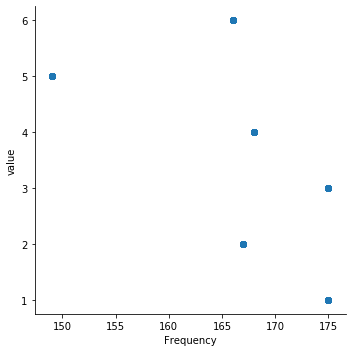

In [23]:
sns.lmplot(x = 'Frequency', y = 'value', data=dice_sort, fit_reg=False)

In [24]:
"""
It was changed because we were working with two diffwrwnt datasets
"""

'\nIt was changed because we were working with two diffwrwnt datasets\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [25]:
# your code here
data = pd.read_csv('../data/ages_population.csv')
data.head()

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0


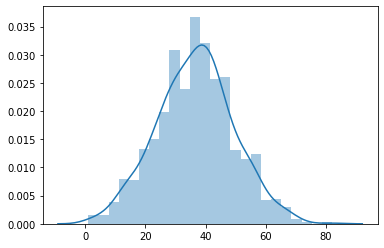

In [26]:
sns.distplot(data)

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [27]:
# your code here
np.mean(data)

observation    36.56
dtype: float64

In [28]:
data['observation'].std()

12.816499625976762

In [29]:
"""
The mean was in my range but standart deviasion was not(
"""

'\nThe mean was in my range but standart deviasion was not(\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [30]:
# your code here
ages = pd.read_csv('../data/ages_population2.csv')
ages.head()

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0


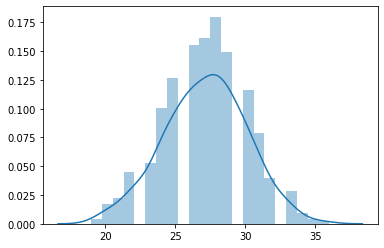

In [31]:
sns.distplot(ages)

In [32]:
np.mean(ages)

observation    27.155
dtype: float64

In [33]:
ages['observation'].std()

2.969813932689186

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [34]:
"""
as i was thinking, the mean number in this case is smaller then in previous
also destribution is smaller (as I predict)
"""

'\nas i was thinking, the mean number in this case is smaller then in previous\nalso destribution is smaller (as I predict)\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [35]:
# your code here
# oops I already did it

In [36]:
"""
your comments here
"""

'\nyour comments here\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [37]:
# your code here
ages3 = pd.read_csv('../data/ages_population3.csv')
ages3.head()

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0


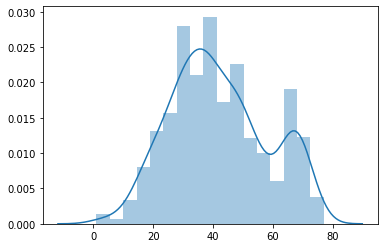

In [38]:
sns.distplot(ages3)

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [39]:
# your code here
np.mean(ages3)

observation    41.989
dtype: float64

In [40]:
ages3['observation'].std()

16.144705959865934

In [41]:
"""
The mean is bigger and the deviation is more wide
"""

'\nThe mean is bigger and the deviation is more wide\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [42]:
# your code here
# I'm sorry but there are only 3 quartiles!
print("Q1 = " + str(np.percentile(ages, 25)))
print("Q2 = " + str(np.percentile(ages, 50)))
print("Q3 = " + str(np.percentile(ages, 75)))

Q1 = 25.0
Q2 = 27.0
Q3 = 29.0


In [43]:
mean1 = ages.mean()
median1 = ages.median()
print('The difference between  mean and median = ', float(mean1 - median1))

The difference between  mean and median =  0.15500000000000114


In [44]:
'''
The quartiles are almost equal to each other and it means that distribution is almost normal as we can see at plot.
Also difference between mean and median is small in this case
'''

'\nThe quartiles are almost equal to each other and it means that distribution is almost normal as we can see at plot.\n\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [45]:
# your code here
print("Q1 = " + str(np.percentile(ages3, 25)))
print("Q2 = " + str(np.percentile(ages3, 50)))
print("Q3 = " + str(np.percentile(ages3, 75)))

Q1 = 30.0
Q2 = 40.0
Q3 = 53.0


In [46]:
mean2 = ages3.mean()
median2 = ages3.median()
print('The difference between  mean and median = ', float(mean2 - median2))

The difference between  mean and median =  1.9889999999999972


In [47]:
"""
The destribution is not so normal so there is some difference between mean and median
Also the quartiles are not equal becase the distribution is not really normal
"""

'\nThe destribution is not so normal so there is some difference between mean and median\nAlso the quartiles are not equal becase the distribution is not really normal\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [48]:
# your code here

In [49]:
"""
your comments here
"""

'\nyour comments here\n'